In [53]:
### libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# other libraries
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud, STOPWORDS
import codecs


### read and explore data

In [2]:
## read data without live videos
df = pd.read_csv("hessas_nolive.csv")
df.head()

created_time  \
0  2021-09-06T04:18:01+0000   
1  2021-09-05T19:13:35+0000   
2  2021-09-06T05:06:15+0000   
3  2021-09-06T00:02:03+0000   
4  2021-09-05T19:06:33+0000   

                                             message  \
0                                     Mohammed Adel    
1                      ŸÖÿ¥ ÿ®Ÿäÿ¨Ÿä ŸÖŸÜŸáÿß ÿ≠ÿßÿ¨ÿ© ÿßÿ±ÿ≠ŸÖŸàŸÜÿß ÿ®ŸÇŸâ   
2                                          ÿßŸÑŸÅŸäÿ≤Ÿäÿßÿ°    
3  ŸÜÿ±ÿ¨Ÿà ÿßŸÑÿ±ÿßŸÅÿ© ÿ®ÿßŸÑÿ∑ŸÑÿßÿ® ŸÅŸä ÿßŸÑÿØŸàÿ± ÿßŸÑÿ´ÿßŸÜŸä ŸàŸÖÿ±ÿßÿπÿßÿ™ŸáŸÖ ...   
4                                        ŸÜŸáÿßŸäŸá ÿ±ÿ≠ŸÑŸá    

                                id from  \
0  271594718130347_271821218107697  NaN   
1  271594718130347_271610824795403  NaN   
2  271594718130347_271840278105791  NaN   
3  271594718130347_271721658117653  NaN   
4  271594718130347_271608141462338  NaN   

                                           Translate is_human  sentment  \
0                                     Mohammed Adel         T   neutral   
1              Nothing comes of it. Have mercy on us        F  negative   
2                                           Physics         F   neutral   
3  ŸÜÿ±ÿ¨Ÿà ÿßŸÑÿ±ÿßŸÅÿ© ÿ®ÿßŸÑÿ∑ŸÑÿßÿ® ŸÅŸä ÿßŸÑÿØŸàÿ± ÿßŸÑÿ´ÿßŸÜŸä ŸàŸÖÿ±ÿßÿπÿßÿ™ŸáŸÖ ...        T   neutral   
4                               the end of the trip         F   neutral   

   positive  neutral  negative  
0      0.00     1.00      0.00  
1      0.21     0.24      0.55  
2      0.13     0.83      0.04  
3      0.00     1.00      0.00  
4      0.10     0.86      0.04

### explore the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14870 entries, 0 to 14869
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created_time  14870 non-null  object 
 1   message       14870 non-null  object 
 2   id            14870 non-null  object 
 3   from          43 non-null     object 
 4   Translate     14867 non-null  object 
 5   is_human      14870 non-null  object 
 6   sentment      14870 non-null  object 
 7   positive      14870 non-null  float64
 8   neutral       14870 non-null  float64
 9   negative      14870 non-null  float64
dtypes: float64(3), object(7)
memory usage: 1.1+ MB


In [4]:
df.describe()

positive       neutral      negative
count  14870.000000  14870.000000  14870.000000
mean       0.124010      0.757987      0.118003
std        0.249091      0.343985      0.261390
min        0.000000      0.000000      0.000000
25%        0.000000      0.680000      0.000000
50%        0.010000      0.930000      0.010000
75%        0.120000      1.000000      0.060000
max        1.000000      1.000000      1.000000

### fix the data 

In [5]:
# drop embity columne
df.drop("from", axis = 1, inplace = True)

In [6]:
## fix time dtypes
df.created_time =  df["created_time"].str.slice(0, 10)
df["date"] = df["created_time"].str.slice(0, 7)
df.created_time

0        2021-09-06
1        2021-09-05
2        2021-09-06
3        2021-09-06
4        2021-09-05
            ...    
14865    2020-12-11
14866    2020-12-15
14867    2020-12-06
14868    2021-01-10
14869    2021-08-01
Name: created_time, Length: 14870, dtype: object

### filter data with human mentions and over rating

In [7]:
## drop human data
hdf = df.query('is_human != "T"')

## chose data without over rating
nudf = hdf.query('neutral < 0.7')

no need for this plot bit it's here

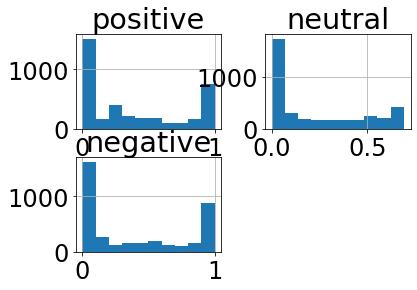

In [109]:
_ = nudf.hist()

### draw the total interactionscolors = sns.color_palette()

In [18]:
colors = sns.color_palette()

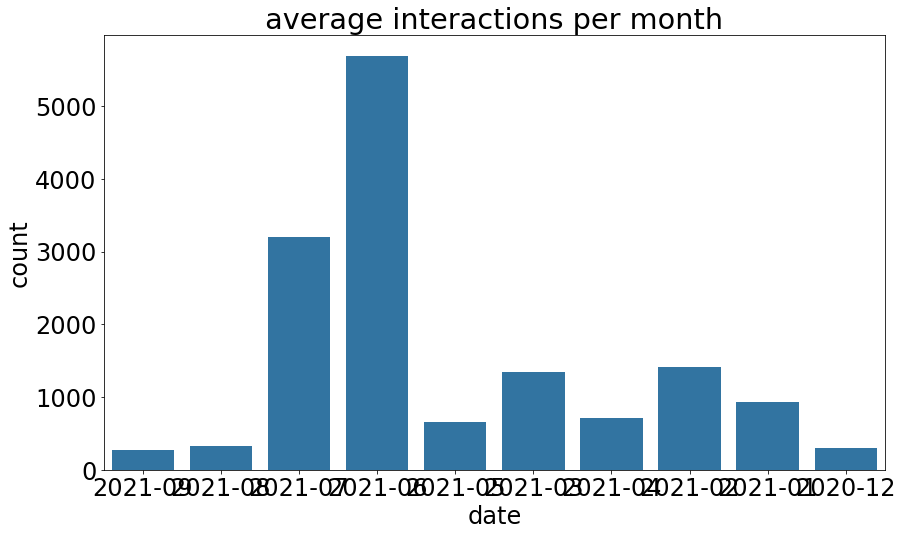

In [108]:
plot = plt.subplots(figsize = (14,8))
plot = sns.countplot(data = df,x = "date", color = colors[0])
_ = plt.ylabel("interactions count")
_ = plt.ylabel("count")
_ = plt.title(" average interactions per month ")

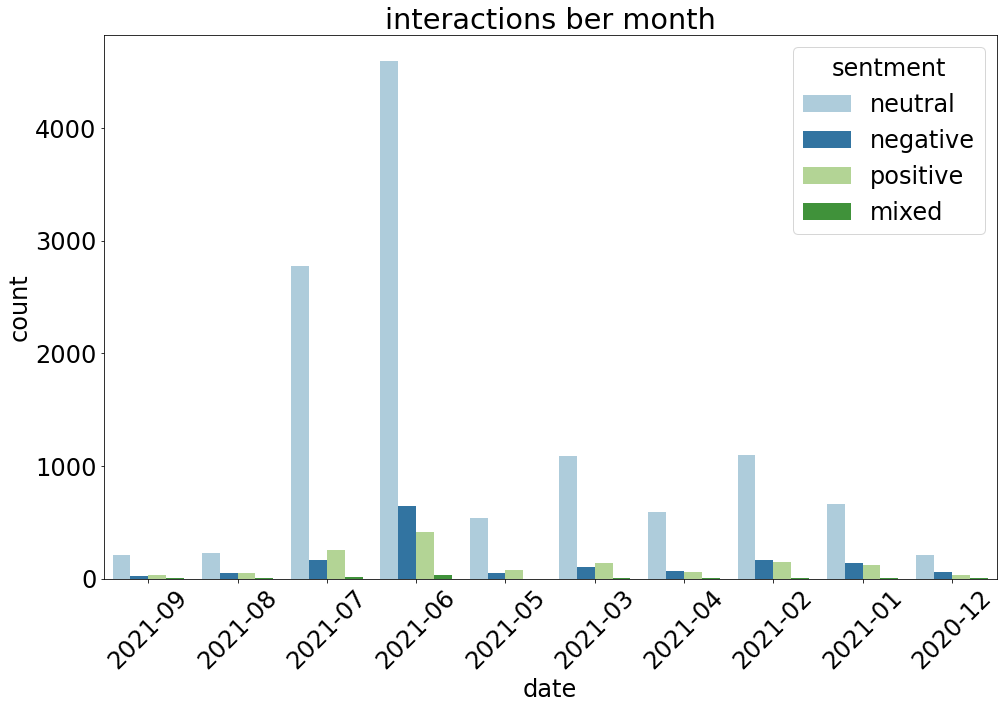

In [107]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = df, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

In [ ]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = hdf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month without mentions')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

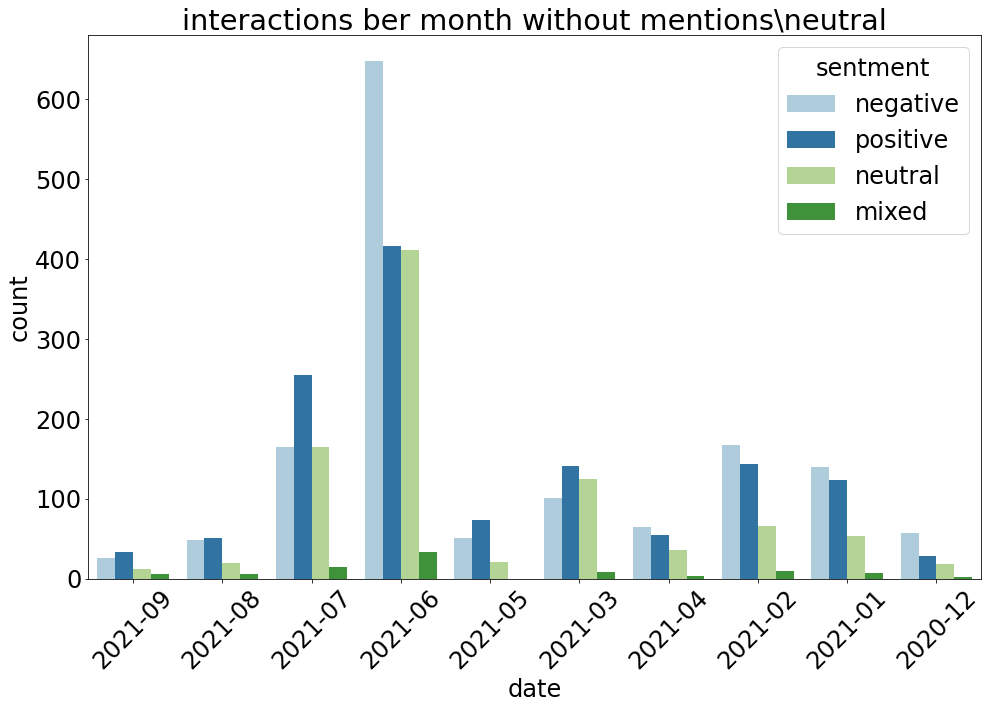

In [13]:
plot = plt.subplots(figsize = (16,10))
plot = sns.countplot(data = nudf, x ="date",hue = "sentment", palette = 'Paired')
_ = plt.xticks(rotation=45)
plt.title('interactions ber month without mentions\\neutral')
plt.rcParams.update({'font.size':24})
_ = plt.ylabel("count")

In [14]:
me = hdf[["neutral", "positive", "negative"]].groupby(hdf["date"]).mean()
me

neutral  positive  negative
date                                 
2020-12  0.602561  0.148415  0.249024
2021-01  0.535202  0.225810  0.238988
2021-02  0.635000  0.174798  0.190202
2021-03  0.657314  0.205268  0.137419
2021-04  0.637446  0.172124  0.190430
2021-05  0.612917  0.230130  0.156953
2021-06  0.599204  0.183847  0.216949
2021-07  0.644016  0.222783  0.133202
2021-08  0.533508  0.241371  0.225121
2021-09  0.598984  0.229893  0.171123

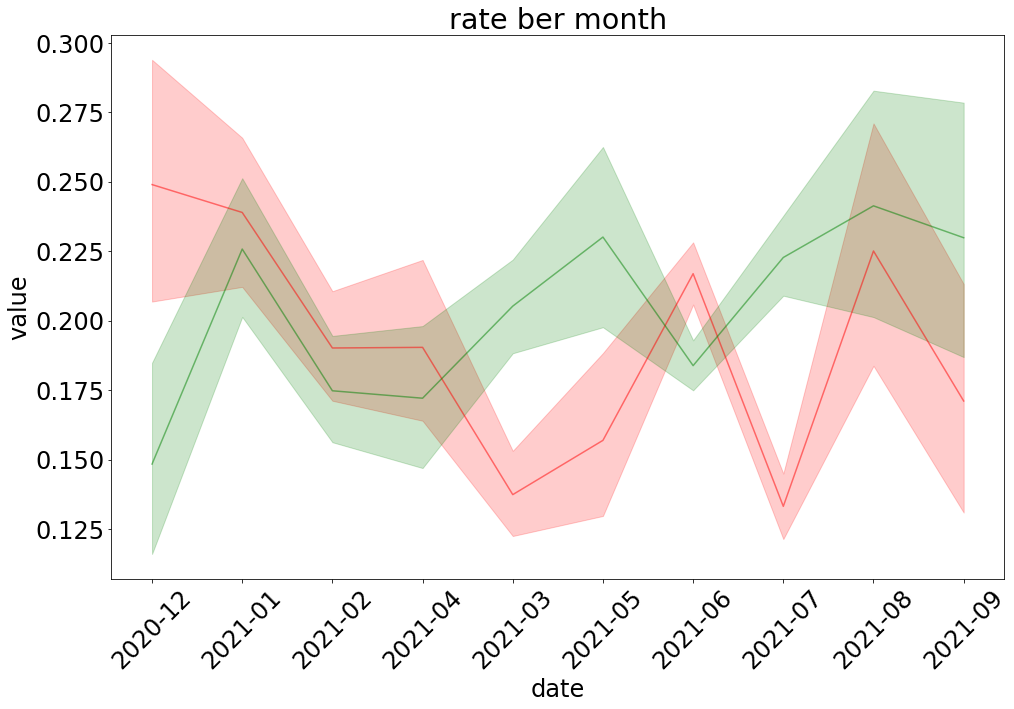

In [15]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=hdf, x="date", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=hdf, x="date", y="positive", color = "g", alpha = 0.5)
plt.gca().invert_xaxis()
_ = plt.xticks(rotation=45)
plt.title('rate ber month')
_ = plt.ylabel("value")

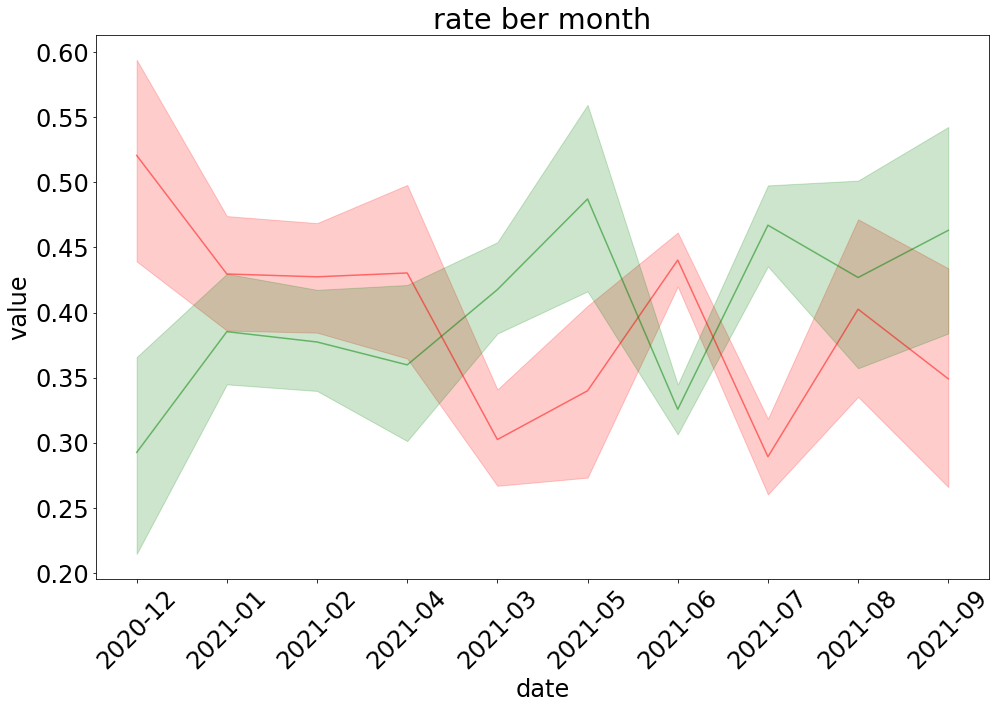

In [16]:
fig, plot = plt.subplots(figsize = (16,10))
plot = sns.lineplot(data=nudf, x="date", y="negative", color = "r", alpha = 0.5)
plot = sns.lineplot(data=nudf, x="date", y="positive", color = "g", alpha = 0.5)
plt.gca().invert_xaxis()
plt.title('rate ber month')
_ = plt.xticks(rotation=45)
_ = plt.ylabel("value")

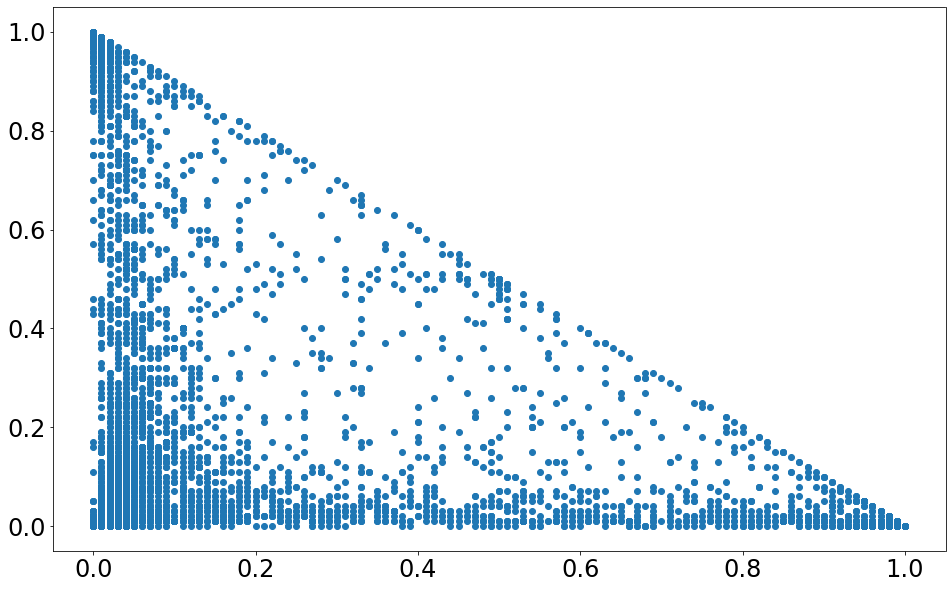

In [17]:
fig, plot = plt.subplots(figsize = (16,10))
plt.scatter(x = hdf["negative"], y =hdf["positive"] )

In [18]:
colors = sns.color_palette()

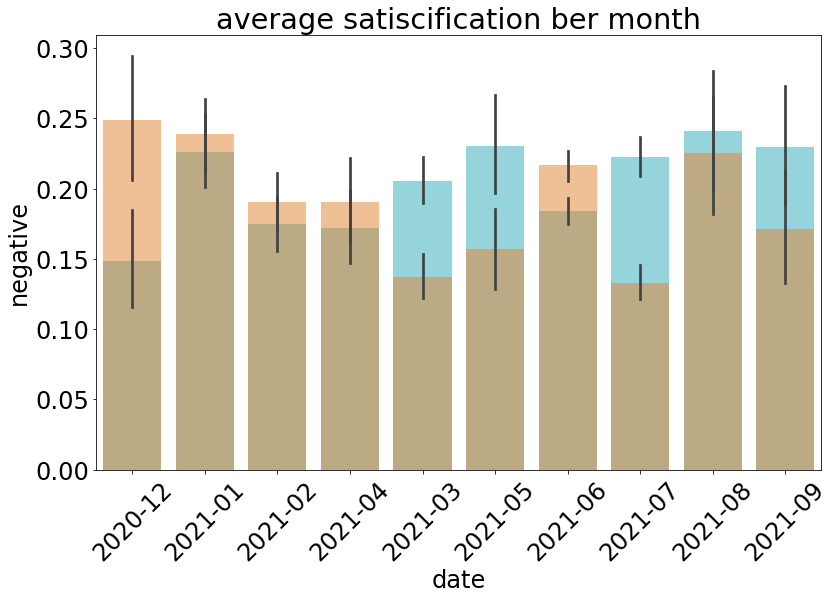

In [106]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = hdf, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = hdf, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.title('average satiscification ber month')
plt.gca().invert_xaxis()
_ = plt.xticks(rotation=45)

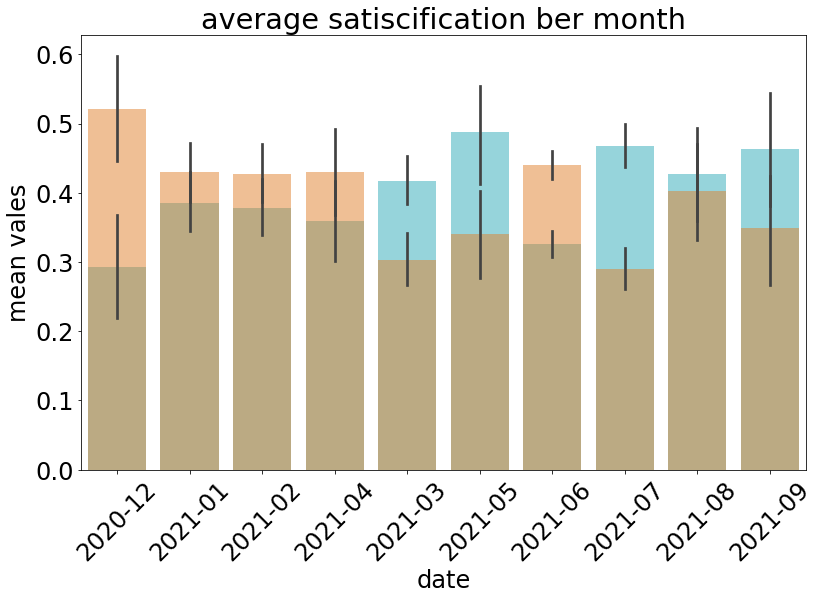

In [105]:
plot = plt.subplots(figsize = (13,8))
plot = sns.barplot(data = nudf, x ="date",  y="positive", color = colors[-1], alpha = 0.5)
plot = sns.barplot(data = nudf, x ="date",  y="negative", color = colors[1], alpha = 0.5)
plt.gca().invert_xaxis()
plt.title('average satiscification ber month')
_ = plt.ylabel("mean vales")
_ = plt.xticks(rotation=45)

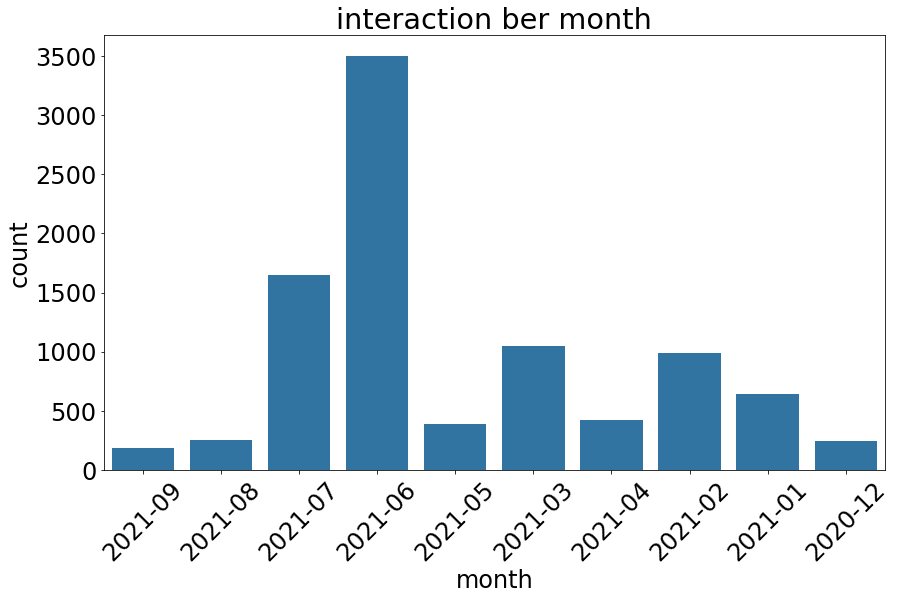

In [104]:
plot = plt.subplots(figsize = (14,8))
plot = sns.countplot(data = hdf,x = "date", color = colors[0])
_ = plt.xticks(rotation=45)
plt.title('interaction ber month')
_ = plt.ylabel("count")
_ = plt.xlabel("month")

In [22]:
df.query('sentment == "negative"').sample(10)

created_time                                            message  \
6829    2021-06-11               ÿßÿ¨ÿßÿ®ÿßÿ™ ÿßŸÑŸÑÿ∫Ÿá ÿßŸÑŸÅÿ±ŸÜÿ≥ŸäŸá ÿ®Ÿáÿß ÿ£ÿÆÿ∑ÿßÿ°.....   
11407   2021-03-10                                               ŸÜŸÇ=3   
13791   2021-01-11  ŸÑŸä ÿ≠ÿ∂ÿ±ÿ™ŸÉŸàÿß ÿØŸäŸÖÿß ÿ™ŸÇŸàŸÑŸàÿß ÿ™ÿ®ÿπŸÜÿß ŸàŸÖŸÅŸäÿ¥ ÿßŸä ÿ¨ÿØŸäÿØ ÿ®ŸäŸÜ...   
11098   2021-03-16  ÿßŸÑÿ™ÿ±ŸÖ ÿßŸÑÿ´ÿßŸÜŸä Ÿáÿ™ŸÜÿ≤ŸÑŸàÿß ÿ£ŸÖÿ™Ÿá ÿπŸÑŸâ ÿßŸÑŸÖŸÜÿµŸá ÿßŸÜÿß ŸÖÿπÿ™ŸÖÿØ...   
6430    2021-06-14  ŸÑŸà ÿ≥ŸÖÿ≠ÿ™ŸÖ ÿ™ÿ≠ÿßŸàŸÑŸàÿß ÿ™ÿØŸàÿß ŸÅÿ±ÿµ ŸÑÿ£ÿ®ŸÜÿßÿ¶ŸÜÿß ŸÅŸä ÿßŸÑÿÆÿßÿ±ÿ¨ ŸÑ...   
6823    2021-06-12                   ŸáŸä ÿßŸÑŸÑÿ∫Ÿá ÿßŸÑÿßŸÜÿßŸÜŸäŸá ŸÑŸäŸá ŸÖÿ¥ ÿ∏ÿßŸáÿ±ÿßŸÑŸä   
1201    2021-07-12        ŸÖŸäŸÜŸÅÿπÿ¥ ŸÖÿπÿßŸÉŸàÿß ŸÖÿ±ÿßÿ¨ÿπÿ© ÿ™ÿßŸÜŸä \nŸÖÿ≠ÿØÿ¥ ŸÅÿßÿØŸÜÿß ÿÆÿßŸÑÿµ   
5581    2021-06-20  ÿßŸÑŸÅÿØŸäŸàŸáÿßÿ™ ÿßŸÑŸÖÿ±ÿßÿ¨ÿπŸá ŸÖÿ¥ ÿ¥ÿ∫ÿßŸÑŸá ÿßŸÑÿßŸÖÿ™ÿ≠ÿßŸÜÿßÿ™ ÿ®ÿ≥ ŸáŸä ÿß...   
7411    2021-06-22                                ÿ®ÿ≥ ŸÅŸä ÿßÿ¨ÿßÿ®ÿßÿ™ ÿ∫ŸÑÿ∑ ÿüÿü   
7507    2021-06-19  ŸÅÿπŸÑÿß ŸÖÿ≠ÿ™ŸàŸä ÿ≠ŸäÿØ ÿ®ÿ≥ ŸÑŸÑÿßÿ≥ŸÅ ÿ™ÿßÿ≤ŸÑ ŸÖÿ™ÿßÿÆÿ± ÿßŸàŸâ ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂...   

                                    id  \
6829   216542786968874_216583946964758   
11407  449644793024666_449679799687832   
13791  124938512795969_124984639458023   
11098  163467848943035_163532502269903   
6430   218338200122666_218384240118062   
6823   216542786968874_217147130241773   
1201   235826998373786_235828548373631   
5581   219601213329698_221792776443875   
7411   215541427069010_404234234166702   
7507   215541427069010_199220671974483   

                                               Translate is_human  sentment  \
6829   The answers of the French language have mistak...        F  negative   
11407                                              Nag=3        F  negative   
13791  you always say ours and there is nothing new t...        F  negative   
11098  The second term, when will you go down to the ...        F  negative   
6430   Please try to give our children opportunities ...        F  negative   
6823      why is the selfish language not apparent to me        F  negative   
1201                     You can't have a second review         F  negative   
5581   reviewed videos are not only working exams why...        F  negative   
7411                       But there are wrong answers??        F  negative   
7507   Really it contains a neutral but unfortunately...        F  negative   

       positive  neutral  negative     date  
6829       0.00     0.00      1.00  2021-06  
11407      0.03     0.20      0.77  2021-03  
13791      0.00     0.03      0.97  2021-01  
11098      0.00     0.00      1.00  2021-03  
6430       0.00     0.00      1.00  2021-06  
6823       0.00     0.00      1.00  2021-06  
1201       0.00     0.01      0.99  2021-07  
5581       0.02     0.02      0.96  2021-06  
7411       0.00     0.00      1.00  2021-06  
7507       0.12     0.00      0.88  2021-06

# live videos
> collect live revision videos and analyse them

In [4]:
live_df = pd.read_csv("hessas_live.csv")
live_df.head()

created_time                                          message  \
0  2021-08-01T16:28:09+0000                             ÿßŸÑŸÖÿ¥ÿ™ŸÇŸá ÿßŸÑÿ™ÿßŸÜŸäŸá ÿ®ÿµŸÅÿ±   
1  2021-08-01T16:01:36+0000                                 ÿ¨ÿ≤ÿßŸÉŸÖ ÿßŸÑŸÑŸá ÿÆŸäÿ±ÿß    
2  2021-08-01T16:27:15+0000                                 Sohaila Ibrahim    
3  2021-08-01T16:04:01+0000                                   Ali Hitham Zsc   
4  2021-08-01T16:22:39+0000  Ahmed Hegazy ÿßÿ≠ŸÖÿØ ŸÖÿ≠ŸÖŸàÿØ ÿπÿ®ÿØ ÿßŸÑÿ®ÿØŸäÿπ ≈∏aza≈à A√Ωma≈à    

                                  id from  \
0  1967631546735549_1967659020066135  NaN   
1  1967631546735549_1967633510068686  NaN   
2  1967631546735549_1967657396732964  NaN   
3  1967631546735549_1967635983401772  NaN   
4  1967631546735549_1967653003400070  NaN   

                                         Translate is_human  sentment  \
0                   the other derivative is yellow        F   neutral   
1                         May God reward you well         F  positive   
2                                 Sohaila Ibrahim         T   neutral   
3                                   Ali Hitham Zsc        T   neutral   
4  Ahmed Hegazy ÿßÿ≠ŸÖÿØ ŸÖÿ≠ŸÖŸàÿØ ÿπÿ®ÿØ ÿßŸÑÿ®ÿØŸäÿπ ≈∏aza≈à A√Ωma≈à         T   neutral   

   positive  neutral  negative                           post_id  \
0      0.00      1.0      0.00  102899871666500_1967631546735549   
1      0.99      0.0      0.01  102899871666500_1967631546735549   
2      0.00      1.0      0.00  102899871666500_1967631546735549   
3      0.00      1.0      0.00  102899871666500_1967631546735549   
4      0.00      1.0      0.00  102899871666500_1967631546735549   

             genere  
0  ÿßŸÑÿ™ŸÅÿßÿ∂ŸÑ ŸàÿßŸÑÿ™ŸÉÿßŸÖŸÑ  
1  ÿßŸÑÿ™ŸÅÿßÿ∂ŸÑ ŸàÿßŸÑÿ™ŸÉÿßŸÖŸÑ  
2  ÿßŸÑÿ™ŸÅÿßÿ∂ŸÑ ŸàÿßŸÑÿ™ŸÉÿßŸÖŸÑ  
3  ÿßŸÑÿ™ŸÅÿßÿ∂ŸÑ ŸàÿßŸÑÿ™ŸÉÿßŸÖŸÑ  
4  ÿßŸÑÿ™ŸÅÿßÿ∂ŸÑ ŸàÿßŸÑÿ™ŸÉÿßŸÖŸÑ

#### Fix data
> setup time data <br>select non mention data<br>

In [79]:
## setup time
live_df.created_time =  live_df["created_time"].str.slice(0, 10)
live_df["date"] = live_df["created_time"].str.slice(0, 7)
live_df.created_time

0        2021-08-01
1        2021-08-01
2        2021-08-01
3        2021-08-01
4        2021-08-01
            ...    
40618    2020-12-30
40619    2020-12-30
40620    2020-12-30
40621    2020-12-30
40622    2020-12-30
Name: created_time, Length: 40623, dtype: object

In [80]:
live_df = live_df.query('is_human != "T"')

#### explore data

In [81]:
live_df.query('genere == "ŸÑŸÑÿ∫ÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ©"').sample(20)

created_time                                            message  \
13086   2021-07-08                            ÿπŸÑŸä ÿßŸÑŸÑŸá ÿ≠ŸÉÿßŸäÿ™ŸÉ Ÿäÿß ÿØŸÅÿπŸá   
39642   2020-12-30     ŸÑŸäŸá ŸÖÿßŸÅŸäÿ¥ ÿ¥ÿ±ÿ≠ ŸÑÿ∫Ÿá ÿπÿ±ÿ®ŸäŸá ŸÑÿßŸàŸÑŸâ ÿ´ÿßŸÜŸàŸâ ÿπŸÑŸâ ÿßŸÑŸÖŸÜÿµŸá   
13669   2021-07-08                                               ŸáŸäÿ¶ÿ©   
16317   2021-07-08                   Walaa Adel  ŸáŸäÿ∑ŸàŸÑ ÿØŸá ŸàŸÑÿß ÿßŸä üòÇüòÇüòÇüòÇ   
14879   2021-07-08                             ŸÖÿ®ÿ™ÿØÿ£ ÿ´ÿßŸÜŸç-ÿ™ŸàŸÉŸäÿØ ŸÖÿπŸÜŸàŸä   
15285   2021-07-08                                    ŸáŸà ÿØŸá ÿßŸÑÿßŸÖÿ™ÿ≠ÿßŸÜÿü   
15348   2021-07-08                                                ÿ®ÿØŸÑ   
13668   2021-07-08                             ŸàŸÑÿß ÿØŸá ŸàŸÑÿß ÿØŸá ŸàŸÑÿß ÿØŸá\n   
12831   2021-07-08                ÿ∑ÿ® ŸÖÿ™ÿ¨Ÿäÿ® ÿ≠ÿßÿ¨ÿßÿ™ ÿ™ÿ≠ŸÑ ÿπŸÑŸäŸáÿß ÿßÿ≠ÿ≥ŸÜ ÿ∑ÿßÿßÿßÿ®   
39798   2021-01-03                                         ÿ® ÿßŸÑÿßÿ¨ÿßÿ®Ÿá    
18222   2021-07-08                                            ÿßŸÑŸÖÿπÿßŸÜŸä   
16519   2021-07-08                           ŸáŸà ÿØŸá ŸÉÿØŸá ŸÖÿ±ÿßÿ¨ÿπÿ© ÿßŸÑŸÇÿµÿ©!    
17406   2021-07-08      ÿπÿßŸäÿ≤ ÿßÿπÿ±ŸÅ ÿßŸÑŸÉŸÑÿßŸÖ ÿØŸá ŸáŸäŸÅÿØŸÜŸä ÿ® ÿßŸäŸá ŸÅŸä ÿßŸÑŸÖÿ≥ÿ™ŸÇÿ®ŸÑ    
12294   2021-07-08                             ÿØÿ© ÿßŸÜÿ™ ÿπŸÜÿØŸÉ ÿ∂ŸÖŸäÿ± ÿ¨ÿØÿßÿßÿß   
13955   2021-07-08                              ÿßŸÑŸÑÿßŸäŸÅ ÿØŸá ÿ®ŸäÿÆŸÑÿµ ÿßŸÖÿ™Ÿä    
15882   2021-07-08                                                ÿ®ŸÑÿ®   
17236   2021-07-08                       ŸÖÿØÿ±ÿ≥ÿ© ÿßŸÑÿπÿßŸÖÿ±Ÿäÿ© ÿßŸÑÿ´ÿßŸÜŸàŸäÿ© ÿ®ŸÜÿßÿ™   
19407   2021-07-08  Ÿäÿß ŸÖÿ≥ÿ™ÿ± ÿ≠ŸÑ ŸÖÿπÿßŸÜÿß ŸÉÿ™Ÿäÿ±ÿ±ÿ±ÿ±ÿ± ŸÉŸÅÿßŸäÿ© ÿ¥ÿ±ÿ≠üôÑüôÉ\n\n‚ùó‚ùó‚ùó‚ùó‚ùó...   
28670   2021-06-27                                     ÿßŸÜŸàÿßÿπ ÿßŸÑŸÖŸÇÿßŸÑÿßÿ™   
15235   2021-07-08                             ÿßŸÑÿ™ÿ£ŸÖŸÑ Ÿà ÿßÿ≥ÿ™ÿ®ÿ∑ÿßŸÜ ÿßŸÑŸÜŸÅÿ≥   

                                      id from  \
13086    339098197702579_207769647791460  NaN   
39642    155841509303552_415296206337998  NaN   
13669   339098197702579_1247745965689387  NaN   
16317   339098197702579_1346477709086015  NaN   
14879    339098197702579_496112378150754  NaN   
15285   339098197702579_4418683294843733  NaN   
15348   339098197702579_1346487319085054  NaN   
13668   339098197702579_1086774098518315  NaN   
12831   339098197702579_4086617174747255  NaN   
39798   155841509303552_3561136047333453  NaN   
18222    339098197702579_241888247492168  NaN   
16519    339098197702579_378963663649833  NaN   
17406    339098197702579_357456602395153  NaN   
12294    339098197702579_567944804586761  NaN   
13955    339098197702579_187057686709349  NaN   
15882    339098197702579_193535085946418  NaN   
17236    339098197702579_339102027702196  NaN   
19407    339098197702579_138849281657488  NaN   
28670  4100025866757033_4100110366748583  NaN   
15235    339098197702579_874271660110544  NaN   

                                               Translate is_human  sentment  \
13086                         God bless your story Pusha        F  positive   
39642  Why is there no Arabic explanation for the fir...        F  negative   
13669                                               Body        F   neutral   
16317         walaa adel will last this long or any üòÇüòÇüòÇüòÇ        F   neutral   
14879                    Second starter - moral emphasis        F   neutral   
15285                                  Is this the exam?        F  positive   
15348                                             change        F   neutral   
13668                     It's a country that's deh wala        F   neutral   
12831              ok don't bring things to solve better        F  negative   
39798                                   with the answer         F   neutral   
18222                                           Meanings        F   neutral   
16519                  This is how to review the story!         F  positive   
17406  i want to know what thi

In [5]:
live_df["message"][13467]

'ŸÖÿ¨ÿ≤ŸàŸÖ ÿ®ŸÑÿßŸÖ ÿßŸÑÿ£ŸÖÿ± ŸÑÿ£ŸÜŸá ŸÖÿ¥ ŸÅÿßÿ° ÿ≥ÿ®ÿ®ŸäŸá ŸÖÿ¥ ŸÖÿ≥ÿ®ŸàŸÇÿ© ÿ®ŸÜŸÅŸä ÿ£Ÿà ÿ∑ŸÑÿ® '

In [6]:
live_df["Translate"][13467]

'It is necessary to blame the matter because it is not a causality that is not preceded by denial or request '

In [26]:
data_lis = live_df.genere.value_counts()
data_lis

ŸÑŸÑÿ∫ÿ© ÿßŸÑÿπÿ±ÿ®Ÿäÿ©               15735
ÿßŸÑŸÑÿ∫ÿ© ÿßŸÑÿ•ŸÜÿ¨ŸÑŸäÿ≤Ÿäÿ©            6736
ÿßŸÑÿ™ÿßÿ±ŸäÿÆ                     2834
ÿßŸÑŸÅŸÑÿ≥ŸÅÿ©                     2656
ÿπŸÑŸÖ ÿßŸÑŸÜŸÅÿ≥                   1604
ÿßŸÑÿ¨ÿ∫ÿ±ÿßŸÅŸäÿß                   1602
ÿßŸÑŸÉŸäŸÖŸäÿßÿ°                    1301
ÿßŸÑÿ•ÿ≥ÿ®ÿßŸÜŸäÿ©                   1297
ŸÑŸÑÿ∫ÿ© ÿßŸÑŸÅÿ±ŸÜÿ≥Ÿäÿ©               1267
ÿßŸÑÿ¨ŸäŸàŸÑŸàÿ¨Ÿäÿß                  1056
ÿßŸÑŸÅŸäÿ≤Ÿäÿßÿ°                     912
ÿßŸÑÿ£ŸÑŸÖÿßŸÜŸäÿ©                    807
ÿßŸÑÿ£ÿ≠Ÿäÿßÿ°                      665
ÿßŸÑÿ•Ÿäÿ∑ÿßŸÑŸäÿ©                    624
ÿßŸÑÿ¨ÿ®ÿ± ŸàÿßŸÑŸáŸÜÿØÿ≥ÿ© ÿßŸÑŸÅÿ±ÿßÿ∫Ÿäÿ©      403
ŸÑÿØÿ±ÿßÿ≥ÿßÿ™ ÿßŸÑÿßÿ¨ÿ™ŸÖÿßÿπŸäÿ©           329
ÿßŸÑÿ±Ÿäÿßÿ∂Ÿäÿßÿ™                    242
ÿßŸÑŸáŸÜÿØÿ≥ÿ©                      195
ÿßŸÑÿπŸÑŸàŸÖ                       128
ÿßŸÑÿØŸäŸÜÿßŸÖŸäŸÉÿß                   104
ÿßŸÑÿ™ŸÅÿßÿ∂ŸÑ ŸàÿßŸÑÿ™ŸÉÿßŸÖŸÑ              71
ÿßŸÑÿßÿ≥ÿ™ÿßÿ™ŸäŸÉÿß                    55
Name: genere, dtype: int64

In [27]:
## fix arabic words
for i in range(len(data_lis)):
    data_lis.rename(index = {list(data_lis.index)[i] : get_display(arabic_reshaper.reshape(list(data_lis.index)[i]))},  inplace = True)

In [28]:
data_lis

Ô∫îÔª¥Ô∫ëÔ∫ÆÔªåÔªüÔ∫ç Ô∫îÔªêÔª†Ôªü               15735
Ô∫îÔª≥Ô∫∞Ôª¥Ôª†Ô∫†ÔªßÔªπÔ∫ç Ô∫îÔªêÔª†ÔªüÔ∫ç             6736
Ô∫¶Ôª≥Ô∫≠Ô∫éÔ∫òÔªüÔ∫ç                     2834
Ô∫îÔªîÔ∫¥Ôª†ÔªîÔªüÔ∫ç                     2656
Ô∫≤ÔªîÔª®ÔªüÔ∫ç Ôª¢Ôª†Ôªã                   1604
Ô∫éÔª¥ÔªìÔ∫çÔ∫ÆÔªêÔ∫†ÔªüÔ∫ç                   1602
Ô∫ÄÔ∫éÔª¥Ôª§Ôª¥ÔªúÔªüÔ∫ç                    1301
Ô∫îÔª¥ÔªßÔ∫éÔ∫íÔ∫≥ÔªπÔ∫ç                    1297
Ô∫îÔª¥Ô∫¥ÔªßÔ∫ÆÔªîÔªüÔ∫ç Ô∫îÔªêÔª†Ôªü               1267
Ô∫éÔª¥Ô∫üÔªÆÔªüÔªÆÔª¥Ô∫†ÔªüÔ∫ç                  1056
Ô∫ÄÔ∫éÔª≥Ô∫∞Ôª¥ÔªîÔªüÔ∫ç                     912
Ô∫îÔª¥ÔªßÔ∫éÔª§ÔªüÔª∑Ô∫ç                     807
Ô∫ÄÔ∫éÔª¥Ô∫£Ôª∑Ô∫ç                       665
Ô∫îÔª¥ÔªüÔ∫éÔªÑÔª≥ÔªπÔ∫ç                     624
Ô∫îÔª¥ÔªèÔ∫çÔ∫ÆÔªîÔªüÔ∫ç Ô∫îÔ∫≥Ô∫™Ôª®Ôª¨ÔªüÔ∫çÔª≠ Ô∫ÆÔ∫íÔ∫†ÔªüÔ∫ç      403
Ô∫îÔª¥ÔªãÔ∫éÔª§Ô∫òÔ∫üÔªªÔ∫ç Ô∫ïÔ∫éÔ∫≥Ô∫çÔ∫≠Ô∫™Ôªü            329
Ô∫ïÔ∫éÔª¥Ô∫øÔ∫éÔª≥Ô∫ÆÔªüÔ∫ç                    242
Ô∫îÔ∫≥Ô∫™Ôª®Ôª¨ÔªüÔ∫ç                      195
Ôª°ÔªÆÔª†ÔªåÔªüÔ∫ç                       128
Ô∫éÔªúÔ

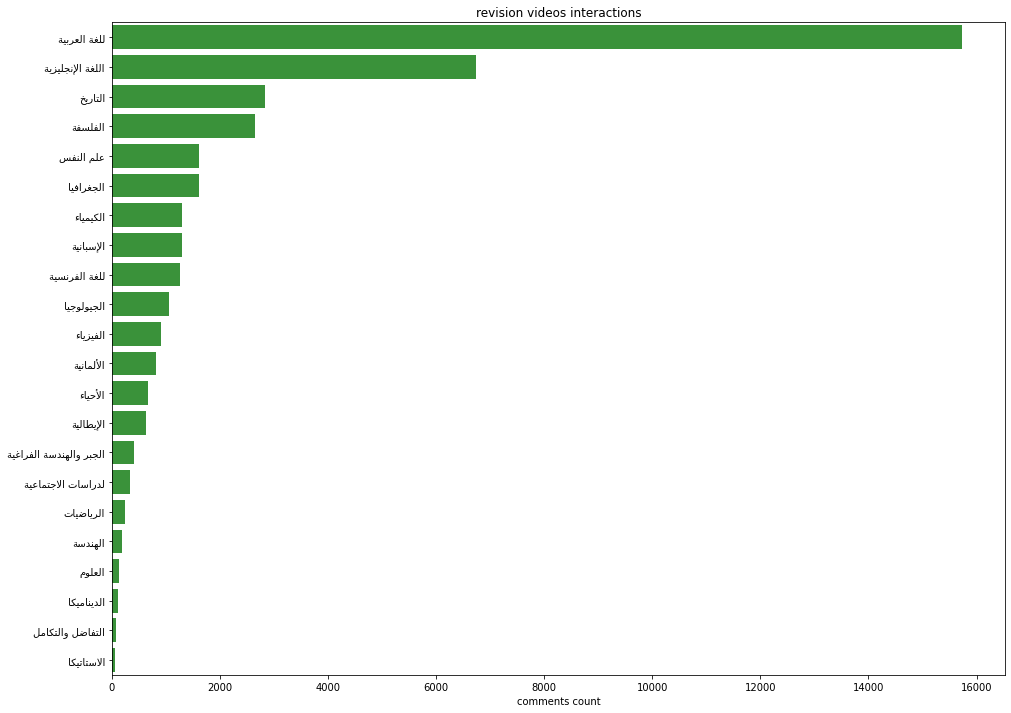

In [29]:
plot = plt.subplots(figsize = (16,12))
sns.barplot(y = data_lis.index, x = data_lis.values, color = colors[2])

plt.title('revision videos interactions')
_ = plt.xlabel("comments count")

### create wordcloud 
> select subjects values<br> create text with words counr<br> reshape arabic words<br>draw wordcloud

In [67]:
data_lis =live_df.genere.value_counts()

In [74]:
## collect data
word_list = []
for i in range(len(data_lis)):
     for j in range(data_lis.values[i]):
        word_list.append(data_lis.index[i].replace(" ", ""))

In [75]:
## join text
text = " ".join(word_list)

In [76]:
## define reshape function

def reshape_arabic(text_file):
    te = arabic_reshaper.reshape(text_file)
    te = get_display(te)
    
      
    word_replace = {"Ô∫Ä":"ÿ°", "Ô∫ç":"ÿß", "Ô∫è":"ÿ®", "Ô∫ï":"ÿ™", "Ô∫ì":"ÿ©", "Ô∫ô":"ÿ´", "Ô∫ù":"ÿ¨",
                    "Ô∫°":"ÿ≠", "ÿÆ":"Ô∫•", "Ô∫©":"ÿØ", "Ô∫´":"ÿ∞", "Ô∫≠":"ÿ±", "Ô∫Ø":"ÿ≤", "Ô∫±":"ÿ≥", 
                    "Ô∫µ":"ÿ¥", "Ô∫π":"ÿµ", "Ô∫Ω":"ÿ∂", "ÔªÅ":"ÿ∑", "ÔªÖ":"ÿ∏", "Ôªâ":"ÿπ", "Ôªç":"ÿ∫",
                    "Ôªë":"ŸÅ", "Ôªï":"ŸÇ", "Ôªô":"ŸÉ", "Ôªù":"ŸÑ", "Ôª°":"ŸÖ", "Ôª•":"ŸÜ", "Ôª©":"Ÿá",
                    "Ôª≠":"Ÿà", "Ôª±":"Ÿâ", "ÔªØ":"Ÿä" ,}                   
    for i in word_replace.keys():
        te = te.replace(i, word_replace[i])
        
    return te

In [77]:
## reshape text
text = reshape_arabic(text)

### generate wordcloud 

In [80]:
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = set(STOPWORDS),
                font_path='Tajawal-Regular.ttf',
                min_font_size = 11,
                collocations=False).generate(text)

### plot trext

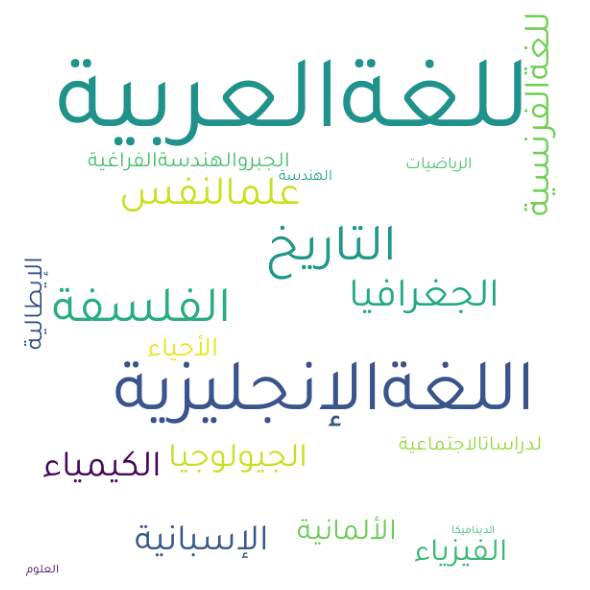

In [81]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show() 
